In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/"
names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Name"]
df = pd.read_csv(url + "iris.data", header=None, names=names)

In [3]:
df.size

750

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Petal Width     150 non-null float64
Name            150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## **1.1 Clustering data with k-means**

### A scatter plot matrix between all features to observe if the three classes appear to be well separated.

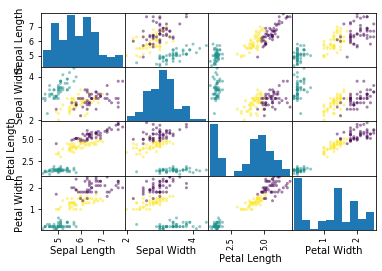

In [5]:
df_color_normalized = df.copy()
flowerNames_dict = {
    "Iris-setosa" : 1,
    "Iris-versicolor" : 2,
    "Iris-virginica" : 0
}

df_color_normalized['Name'] = [flowerNames_dict[x] for x in df_color_normalized['Name']]
pd.plotting.scatter_matrix(df_color_normalized[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], c=df_color_normalized['Name']);

The three classes (Iris-setosa, Iris-versicolor, Iris-virginica) appear to be distinct in the scatter plots (3 different colors). But two of these classes seem to overlap more than the third.

#### Clustered the the data using k-Means clustering (see sklearn.cluster.KMeans).  Formed 3 clusters (nclusters=3), with the four features as the input data, and the resulting clusters are plotted as a 2D scatter plot.

In [6]:
from sklearn.cluster import KMeans
import numpy as np

In [7]:
df_no_name = df.drop(columns='Name')
df_no_name_normalized = pd.get_dummies(df_no_name)
df_no_name_normalized

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
X = np.array(df_no_name_normalized)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

#### Petal width vs Petal length

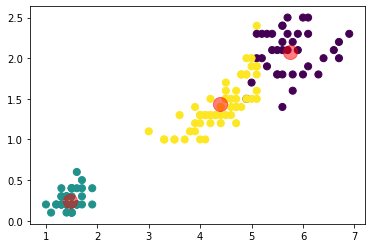

In [9]:
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.5);

#### The cross-tabulation (see pandas.crosstab) of the actual class values and the cluster labels is seen below

In [10]:
pd.crosstab(df['Name'], kmeans.labels_)

col_0,0,1,2
Name,,,
Iris-setosa,0,50,0
Iris-versicolor,2,0,48
Iris-virginica,36,0,14


In [11]:
df['Name'].describe()['count']

150

134 out of 150 features are marked correctly. 2 of the Iris-versicolor and 14 Iris-virginica are marked incorrectly. 

This can be seen in the scatter plot (not to the exact number). The overlap is seen between two clusters, whereas, the third cluster seems completely mutually exclusive (with respect to the other two clusters). The third clusters is very distinct and has no overlap. Also in my opinion, the cluster labels correspond to class labels. (1 - Iris-setosa, 2 - Iris-versicolor, 0 - Iris-virginica).

## **1.2 Hierarchical Clustering of Features**

#### The mutual information between all pairs of features is calculated. This is done to see how similar these features are.

In [12]:
from sklearn.feature_selection import mutual_info_regression

In [13]:
sepal_width = mutual_info_regression(X, df['Sepal Width'])
sepal_length = mutual_info_regression(X, df['Sepal Length'])
petal_length = mutual_info_regression(X, df['Petal Length'])
petal_width = mutual_info_regression(X, df['Petal Width'])

In [14]:
list_of_tuples = list(zip(sepal_length, sepal_width, petal_length, petal_width))

In [15]:
cols = list(df.columns)
cols.remove('Name')
cols

['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [16]:
df_2 = pd.DataFrame(list_of_tuples, columns=cols, index=cols)

In [17]:
df_2

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,3.196331,0.305286,0.845919,0.562678
Sepal Width,0.290931,2.643493,0.352518,0.499983
Petal Length,0.857986,0.335298,3.149720,1.251034
Petal Width,0.615794,0.402273,1.220639,2.706443


####  A dendrogram from the mutual information DataFrame is plotted. 

In [18]:
from scipy.cluster.hierarchy import dendrogram

In [19]:
def plot_dendrogram(model, **kwargs):
    children = model.children_
    dist = np.arange(children.shape[0])+1
    n_obs = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, dist, n_obs])
    dendrogram(linkage_matrix.astype(float), **kwargs)

In [20]:
df_2.size

16

In [21]:
from sklearn.cluster import AgglomerativeClustering

X_agg = np.array(df_2)
clustering = AgglomerativeClustering(n_clusters=3).fit(X_agg)

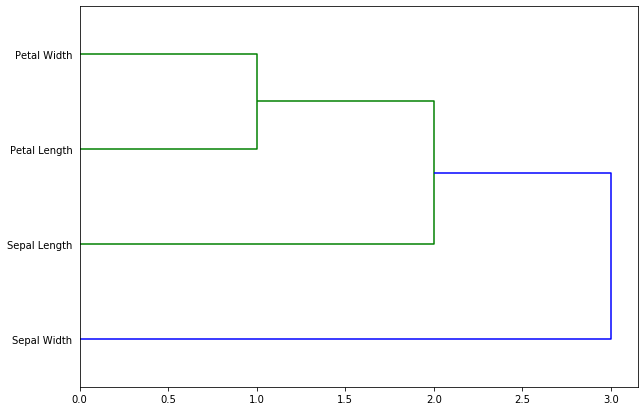

In [22]:
figure = plt.figure(figsize=(10, 7))
plot_dendrogram(clustering, orientation='right', leaf_font_size=10, labels=cols)

According to my observations of the dendrogram:
+ petal width and petal length are most similar
+ Sepal Width is most unlike others